In [2]:
pip install scikit_learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sklearn as sk

In [3]:
dir(sk)

['_BUILT_WITH_MESON',
 '__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_built_with_meson',
 '_config',
 '_distributor_init',
 'base',
 'clone',
 'config_context',
 'exceptions',
 'externals',
 'get_config',
 'logger',
 'logging',
 'os',
 'random',
 'set_config',
 'setup_module',
 'show_versions',
 'sklearn',
 'sys',
 'utils']

In [11]:
import pandas as pd
import numpy as np


In [12]:
salary = pd.read_csv(r"C:\Users\hp\Desktop\training\Salary_Data.csv")
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [13]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [14]:
salary.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [15]:
salary.sample()

,YearsExperience,Salary
15,4.9,67938.0


In [16]:
salary.nunique()

YearsExperience    28
Salary             30
dtype: int64

In [17]:
salary.mean()

YearsExperience        5.313333
Salary             76003.000000
dtype: float64

In [19]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [21]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [23]:
#check for missing value
salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [2]:

import seaborn as sns

<Axes: xlabel='YearsExperience', ylabel='Salary'>

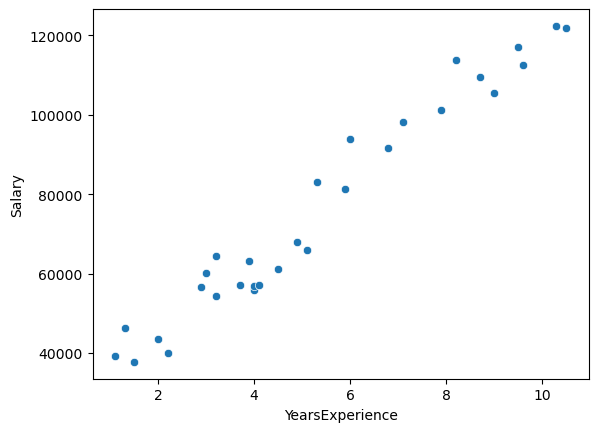

In [31]:
sns.scatterplot(x = "YearsExperience", y = "Salary", data = salary,
               )

In [32]:
#identifying input and output
X = salary[["YearsExperience"]] #input feature
Y = salary ["Salary"] #target Output

In [33]:
#spliting the data set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)


In [34]:
X_train 

,YearsExperience
28,10.3
24,8.7
12,4.0
0,1.1
4,2.2
16,5.1
5,2.9
13,4.1
11,4.0
22,7.9


In [35]:
Y_train

28    122391.0
24    109431.0
12     56957.0
0      39343.0
4      39891.0
16     66029.0
5      56642.0
13     57081.0
11     55794.0
22    101302.0
1      46205.0
2      37731.0
25    105582.0
3      43525.0
21     98273.0
26    116969.0
18     81363.0
29    121872.0
20     91738.0
7      54445.0
10     63218.0
14     61111.0
19     93940.0
6      60150.0
Name: Salary, dtype: float64

In [36]:
X_test

,YearsExperience
27,9.6
15,4.9
23,8.2
17,5.3
8,3.2
9,3.7


In [37]:
Y_test

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: Salary, dtype: float64

In [40]:
#model selection selecting the algorithm
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train,Y_train)


LinearRegression()

In [43]:
y_pred = regression_model.predict(X_test)
print(y_pred)

[115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]


In [42]:
Y_test

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: Salary, dtype: float64

In [48]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
r2 = r2_score(y_pred,Y_test)
print(r2)

0.8961838737587328


In [50]:
mse = mean_squared_error(y_pred,Y_test)
print(mse)

49830096.85590839


In [51]:
mae = mean_absolute_error(y_pred,Y_test)
print(mae)

6286.453830757749


In [52]:
import matplotlib.pyplot as plt

[]

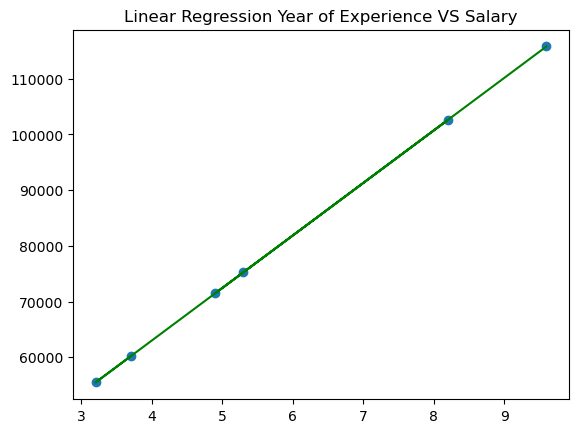

In [59]:
plt.scatter(X_test,y_pred)
plt.plot( X_test , y_pred ,color = 'g')
plt.title("Linear Regression Year of Experience VS Salary")
plt.plot()

In [60]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [61]:
import joblib as jb

In [62]:
jb.dump(regression_model, r"C:\Users\hp\Desktop\training\reg_model.pkl")

['C:\\Users\\hp\\Desktop\\training\\reg_model.pkl']

In [65]:
my_salary_calculator = jb.load(r"C:\Users\hp\Desktop\training\reg_model.pkl")

In [69]:
exp = float(input("Enter Your Experience To Know Your salary : "))
new_data = np.array([[exp]])
prediction = my_salary_calculator.predict(new_data)
print(f"The Predicted Salary for {exp} year Of Experience is {prediction [0]: 2f} INR")


Enter Your Experience To Know Your salary :  4.5


The Predicted Salary for 4.5 year Of Experience is  67728.751965 INR


C:\Users\hp\Downloads\anacondaa\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
